<a href="https://colab.research.google.com/github/NiveshGupta123/ds_nivesh_gupta/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/NiveshGupta123/ds_nivesh_gupta.git

Cloning into 'ds_nivesh_gupta'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 29.77 KiB | 4.25 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
%cd ds_nivesh_gupta

/content/ds_nivesh_gupta


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  **Data Description**


In [5]:
fear_greed = pd.read_csv('/content/ds_nivesh_gupta/csv_files/fear_greed_index.csv')
trades = pd.read_csv('/content/ds_nivesh_gupta/csv_files/historical_data.csv')


In [6]:
fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102574 entries, 0 to 102573
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           102574 non-null  object 
 1   Coin              102574 non-null  object 
 2   Execution Price   102574 non-null  float64
 3   Size Tokens       102574 non-null  float64
 4   Size USD          102574 non-null  float64
 5   Side              102574 non-null  object 
 6   Timestamp IST     102574 non-null  object 
 7   Start Position    102574 non-null  float64
 8   Direction         102574 non-null  object 
 9   Closed PnL        102574 non-null  float64
 10  Transaction Hash  102574 non-null  object 
 11  Order ID          102574 non-null  int64  
 12  Crossed           102574 non-null  bool   
 13  Fee               102574 non-null  float64
 14  Trade ID          102574 non-null  float64
 15  Timestamp         102573 non-null  float64
dtypes: bool(1), float64(

## **Data Integration**

In [10]:
# Standardize and parse dates.
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.strftime('%Y-%m-%d')
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['trade_date'] = trades['Timestamp IST'].dt.strftime('%Y-%m-%d')



In [32]:
# Merge on date (inner join for only matched rows)
merged = pd.merge(trades, fear_greed[['date', 'classification']], left_on='trade_date', right_on='date', how='inner')
merged.to_csv('merged_trades_sentiment.csv', index=False)  # Save merged file for records/shareability
print('/content/ds_nivesh_gupta/csv_files/Merged dataframe saved as merged_trades_sentiment.csv')
merged.head()



/content/ds_nivesh_gupta/csv_files/Merged dataframe saved as merged_trades_sentiment.csv


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,2024-02-12,Greed


## **Data Preparation & Cleaning**

In [12]:
merged.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification
20255,0x8477e447846c758f5a675856001ea72298fd9cb5,IO,6.1924,630.9,3906.79,BUY,2024-12-06 20:23:00,-2480.4,Close Short,-1071.804465,0x138c336177717efdd768040b4b2ecc0000d0ec06a692...,25824238128,True,1.367374,7.120000e+14,1.720000e+12,2024-12-06,2024-12-06,Greed
20256,0x8477e447846c758f5a675856001ea72298fd9cb5,IO,6.1988,541.6,3357.27,BUY,2024-12-06 20:23:00,-1849.5,Close Short,-923.563400,0x138c336177717efdd768040b4b2ecc0000d0ec06a692...,25824238128,True,1.175044,6.610000e+14,1.720000e+12,2024-12-06,2024-12-06,Greed
20257,0x8477e447846c758f5a675856001ea72298fd9cb5,IO,6.2965,523.8,3298.11,BUY,2024-12-06 20:23:00,-1307.9,Close Short,-944.385210,0x138c336177717efdd768040b4b2ecc0000d0ec06a692...,25824238128,True,1.154337,9.030000e+14,1.720000e+12,2024-12-06,2024-12-06,Greed
20258,0x8477e447846c758f5a675856001ea72298fd9cb5,IO,6.3043,539.8,3403.06,BUY,2024-12-06 20:23:00,-784.1,Close Short,-977.442850,0x138c336177717efdd768040b4b2ecc0000d0ec06a692...,25824238128,True,1.191071,3.000000e+13,1.720000e+12,2024-12-06,2024-12-06,Greed
20259,0x8477e447846c758f5a675856001ea72298fd9cb5,IO,6.4071,244.3,1565.25,BUY,2024-12-06 20:23:00,-244.3,Close Short,-467.480265,0x138c336177717efdd768040b4b2ecc0000d0ec06a692...,25824238128,True,0.547839,3.530000e+14,1.720000e+12,2024-12-06,2024-12-06,Greed


In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20260 entries, 0 to 20259
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           20260 non-null  object        
 1   Coin              20260 non-null  object        
 2   Execution Price   20260 non-null  float64       
 3   Size Tokens       20260 non-null  float64       
 4   Size USD          20260 non-null  float64       
 5   Side              20260 non-null  object        
 6   Timestamp IST     20260 non-null  datetime64[ns]
 7   Start Position    20260 non-null  float64       
 8   Direction         20260 non-null  object        
 9   Closed PnL        20260 non-null  float64       
 10  Transaction Hash  20260 non-null  object        
 11  Order ID          20260 non-null  int64         
 12  Crossed           20260 non-null  bool          
 13  Fee               20260 non-null  float64       
 14  Trade ID          2026

In [14]:
merged['Closed PnL'].mean()

np.float64(154.08409470705823)

In [15]:
merged['Size USD'].mean()

np.float64(6833.973867719645)

In [16]:
merged['Size Tokens'].mean()

np.float64(15990.712190932014)

In [17]:
merged['Fee'].mean()

np.float64(1.3990080705107009)

In [18]:
merged['classification'].value_counts()

,count
classification,
Fear,7779
Greed,7607
Extreme Greed,2470
Neutral,1233
Extreme Fear,1171


In [19]:
merged.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [20]:
# Null check
print(merged.isnull().sum())
# Outlier handling (optional example)
merged = merged[merged['Closed PnL'].between(merged['Closed PnL'].quantile(0.01), merged['Closed PnL'].quantile(0.99))]


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
trade_date          0
date                0
classification      0
dtype: int64


## **Exploratory Analysis (EDA)**

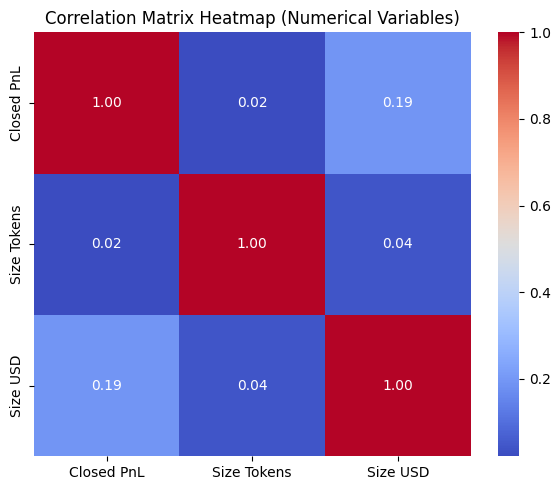

/tmp/ipython-input-2295591912.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='classification', y='Closed PnL', data=merged, order=merged['classification'].value_counts().index, palette='Set2')


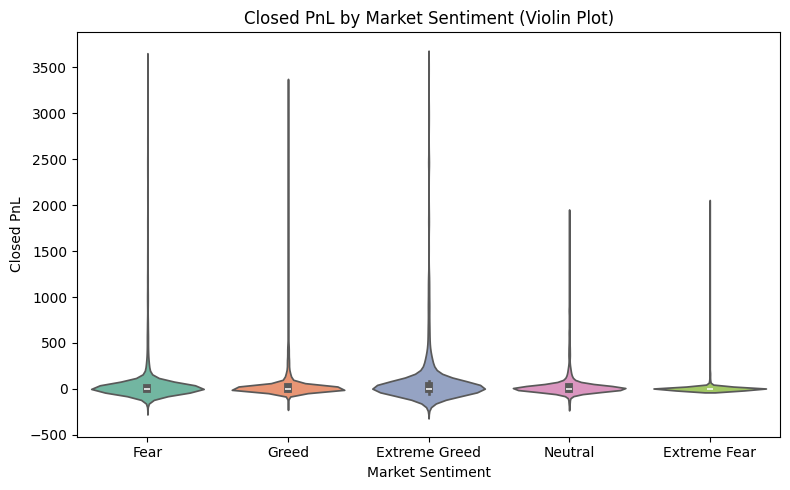

/tmp/ipython-input-2295591912.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Side', y='Closed PnL', data=merged, palette='coolwarm')


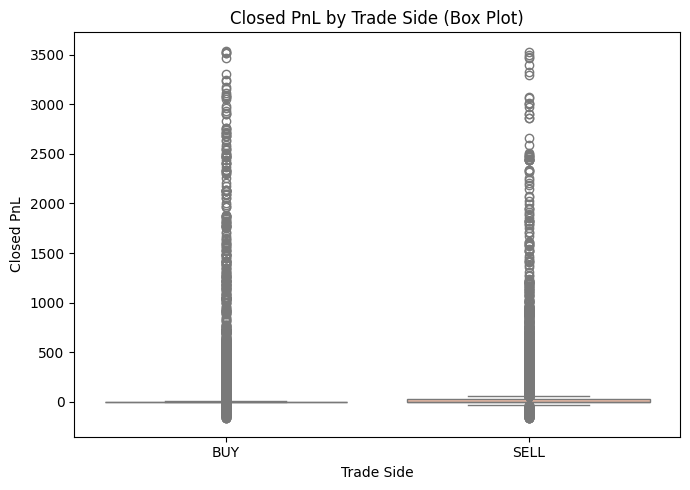

In [21]:

numerical_vars = []
for col in ['Closed PnL', 'Size Tokens', 'Size USD']:
    if col in merged.columns:
        numerical_vars.append(col)

if len(numerical_vars) >= 2:
    corr_matrix = merged[numerical_vars].corr()
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap (Numerical Variables)')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical variables found for correlation heatmap.")


if 'classification' in merged.columns and 'Closed PnL' in merged.columns:
    plt.figure(figsize=(8,5))
    sns.violinplot(x='classification', y='Closed PnL', data=merged, order=merged['classification'].value_counts().index, palette='Set2')
    plt.title('Closed PnL by Market Sentiment (Violin Plot)')
    plt.xlabel('Market Sentiment')
    plt.tight_layout()
    plt.show()

if 'Side' in merged.columns and 'Closed PnL' in merged.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x='Side', y='Closed PnL', data=merged, palette='coolwarm')
    plt.title('Closed PnL by Trade Side (Box Plot)')
    plt.xlabel('Trade Side')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-2111817395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=merged, order=merged['classification'].value_counts().index, palette='coolwarm')


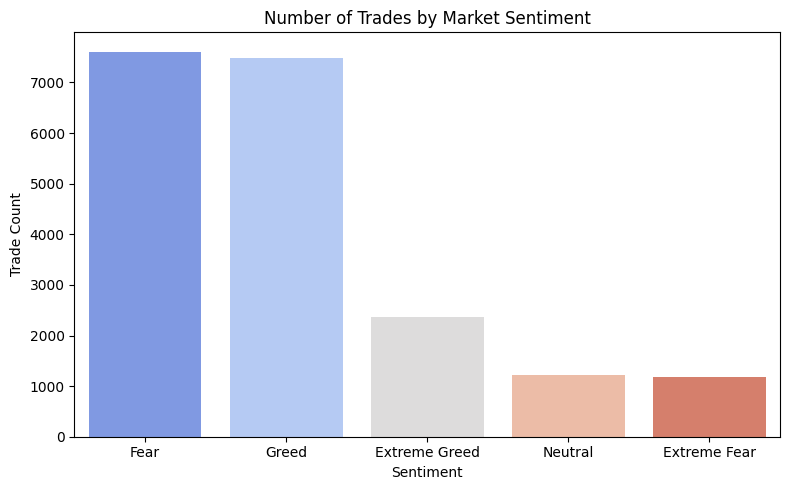

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='classification', data=merged, order=merged['classification'].value_counts().index, palette='coolwarm')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Trade Count')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


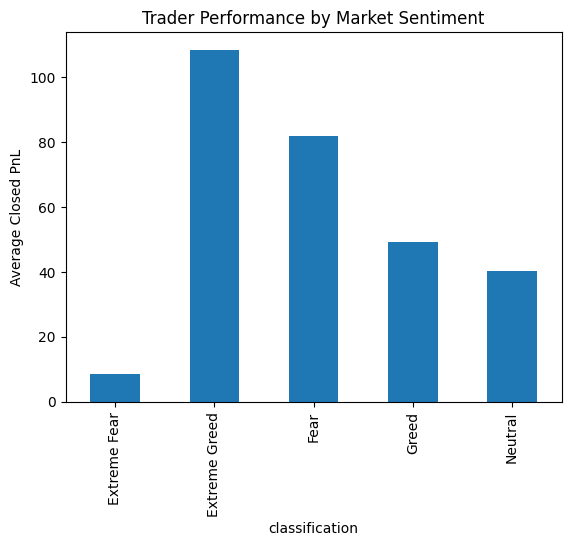

In [23]:
perf_by_sent = merged.groupby('classification')['Closed PnL'].mean()
perf_by_sent.plot(kind='bar')
plt.ylabel('Average Closed PnL')
plt.title('Trader Performance by Market Sentiment')
plt.show()


In [24]:
perf_by_sent = merged.groupby('classification')['Closed PnL'].agg(['count', 'mean', 'median', 'std'])
perf_by_sent['win_rate'] = merged.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean())
print(perf_by_sent.sort_values('count', ascending=False))


                count        mean  median         std  win_rate
classification                                                 
Fear             7610   81.880421     0.0  337.921859  0.377661
Greed            7482   49.196712     0.0  189.090151  0.446004
Extreme Greed    2369  108.415879     0.0  370.246951  0.459266
Neutral          1222   40.167888     0.0  139.462240  0.478723
Extreme Fear     1171    8.582110     0.0   72.237775  0.456020


### **Risk & Outlier Analysis**

/tmp/ipython-input-25887200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='classification', y='Closed PnL', data=merged, order=perf_by_sent.sort_values('count', ascending=False).index, palette='Set2')


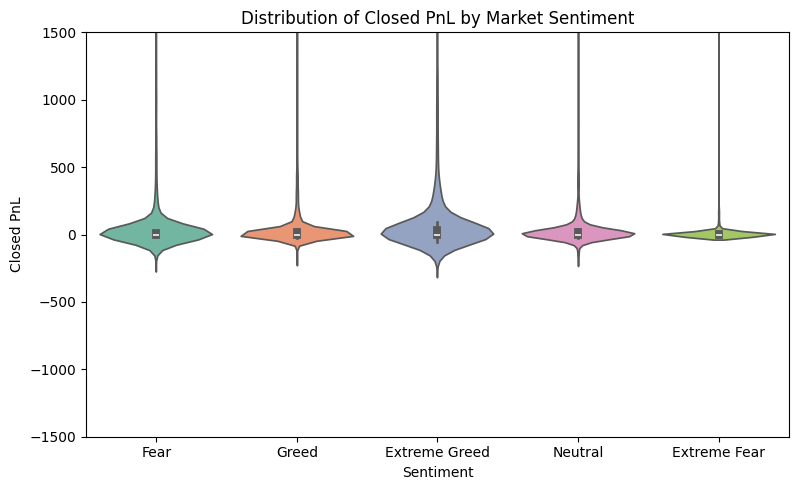

In [25]:
plt.figure(figsize=(8,5))
sns.violinplot(x='classification', y='Closed PnL', data=merged, order=perf_by_sent.sort_values('count', ascending=False).index, palette='Set2')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.ylim(-1500, 1500)  # focus to remove extreme outliers visually for clarity
plt.show()


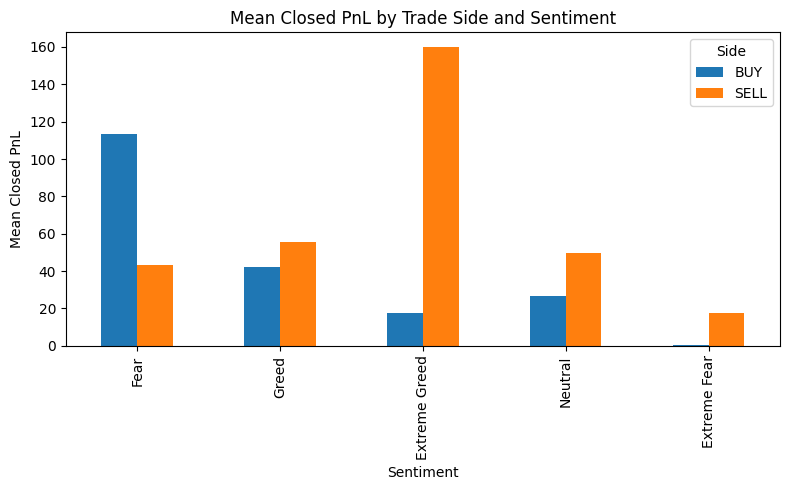

In [26]:
# Side (Buy/Sell) performance under each sentiment
side_perf = merged.groupby(['classification', 'Side'])['Closed PnL'].agg(['count', 'mean', 'median']).reset_index()
side_perf_pivot = side_perf.pivot(index='classification', columns='Side', values='mean')
side_perf_pivot = side_perf_pivot.loc[perf_by_sent.sort_values('count', ascending=False).index]
side_perf_pivot.plot(kind='bar', figsize=(8,5))
plt.title('Mean Closed PnL by Trade Side and Sentiment')
plt.ylabel('Mean Closed PnL')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


In [27]:
trader_score = merged.groupby('Account')['Closed PnL'].sum().sort_values()
print(trader_score.head(), trader_score.tail())


Account
0x430f09841d65beb3f27765503d0f850b8bce7713       0.000000
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891     229.321727
0x420ab45e0bd8863569a5efbb9c05d91f40624641    1762.460000
0x8477e447846c758f5a675856001ea72298fd9cb5    1903.112217
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb    2075.015240
Name: Closed PnL, dtype: float64 Account
0xbaaaf6571ab7d571043ff1e313a9609a10637864    101718.300809
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    145590.479405
0x4f93fead39b70a1824f981a54d4e55b278e9f760    146951.781034
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    317990.614707
0x083384f897ee0f19899168e3b1bec365f52a9012    423876.965598
Name: Closed PnL, dtype: float64


In [28]:
coin_score = merged.groupby('Coin')['Closed PnL'].sum().sort_values()
print(coin_score)


Coin
S         -2493.620080
IO        -1103.639816
BRETT      -874.029129
IP         -393.046500
ILV        -279.068800
             ...      
BTC      107592.936722
@107     216972.158954
HYPE     225493.869323
SOL      283514.257338
ETH      291963.829640
Name: Closed PnL, Length: 125, dtype: float64


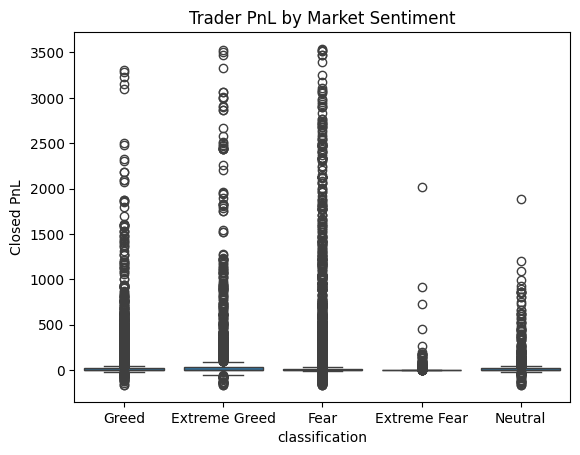

In [29]:
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title('Trader PnL by Market Sentiment')
plt.show()


In [30]:

# Top/bottom trades
print("Top 5 Trades:")
display(merged.nlargest(5, 'Closed PnL')[['Account', 'Coin', 'Closed PnL', 'classification']])
print("Worst 5 Trades:")
display(merged.nsmallest(5, 'Closed PnL')[['Account', 'Coin', 'Closed PnL', 'classification']])




Top 5 Trades:


,Account,Coin,Closed PnL,classification
2359,0x083384f897ee0f19899168e3b1bec365f52a9012,SOL,3539.382845,Fear
3115,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3527.662081,Fear
11673,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@107,3523.098040,Extreme Greed
1669,0x083384f897ee0f19899168e3b1bec365f52a9012,SOL,3519.868212,Fear
467,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,HYPE,3516.405715,Fear


Worst 5 Trades:


,Account,Coin,Closed PnL,classification
8662,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,-165.913550,Neutral
2303,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,-165.015000,Fear
20242,0x8477e447846c758f5a675856001ea72298fd9cb5,IO,-164.756010,Greed
1774,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,-164.723000,Fear
4731,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,-163.597742,Extreme Greed


from matplotlib import pyplot as plt
_df_0['Closed PnL'].plot(kind='hist', bins=20, title='Closed PnL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Account').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Coin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Closed PnL']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Closed PnL'}, axis=1)
              .sort_values('Closed PnL', ascending=True))
  xs = counted['Closed PnL']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Closed PnL', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Account')):
  _plot_series(series, series_name, i)
  fig.legend(title='Account', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Closed PnL')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Closed PnL']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Closed PnL'}, axis=1)
              .sort_values('Closed PnL', ascending=True))
  xs = counted['Closed PnL']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Closed PnL', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Coin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Coin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Closed PnL')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Closed PnL']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Closed PnL'}, axis=1)
              .sort_values('Closed PnL', ascending=True))
  xs = counted['Closed PnL']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Closed PnL', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Closed PnL')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Closed PnL'].plot(kind='line', figsize=(8, 4), title='Closed PnL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Coin'].value_counts()
    for x_label, grp in _df_8.groupby('Account')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Account')
_ = plt.ylabel('Coin')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['classification'].value_counts()
    for x_label, grp in _df_9.groupby('Coin')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coin')
_ = plt.ylabel('classification')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Account'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Closed PnL', y='Account', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Coin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Closed PnL', y='Coin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Closed PnL', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### **Advanced Patterns (Time, Streaks, etc.—if feasible)**

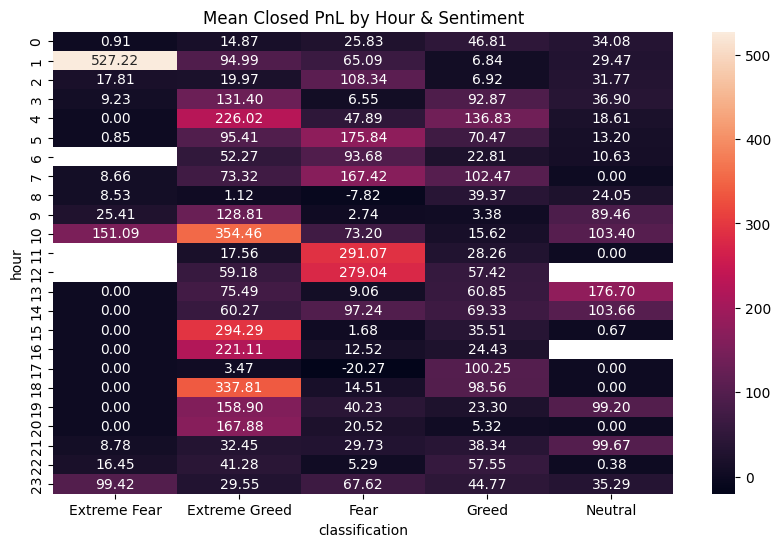

In [31]:
if 'Timestamp IST' in merged.columns:
    merged['hour'] = pd.to_datetime(merged['Timestamp IST']).dt.hour
    plt.figure(figsize=(10,6))
    sns.heatmap(merged.pivot_table('Closed PnL', index='hour', columns='classification', aggfunc='mean'), annot=True, fmt=".2f")
    plt.title('Mean Closed PnL by Hour & Sentiment')
    plt.show()
